In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
from IPython import display
display.clear_output()
!yolo mode=checks

from ultralytics import YOLO 
from IPython.display import display, Image


WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (64 CPUs, 251.7 GB RAM, 472.9/1758.9 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="McoQ2UFDxFzalwE5z5dN")
project = rf.workspace("hetty").project("citrushackandcustom")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.90, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to citrushackandcustom-1 in yolov8:: 100%|██████████| 7572/7572 [00:01<00:00, 6865.45it/s] 


In [3]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/hpate061/CitrusHack/citrushackandcustom-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

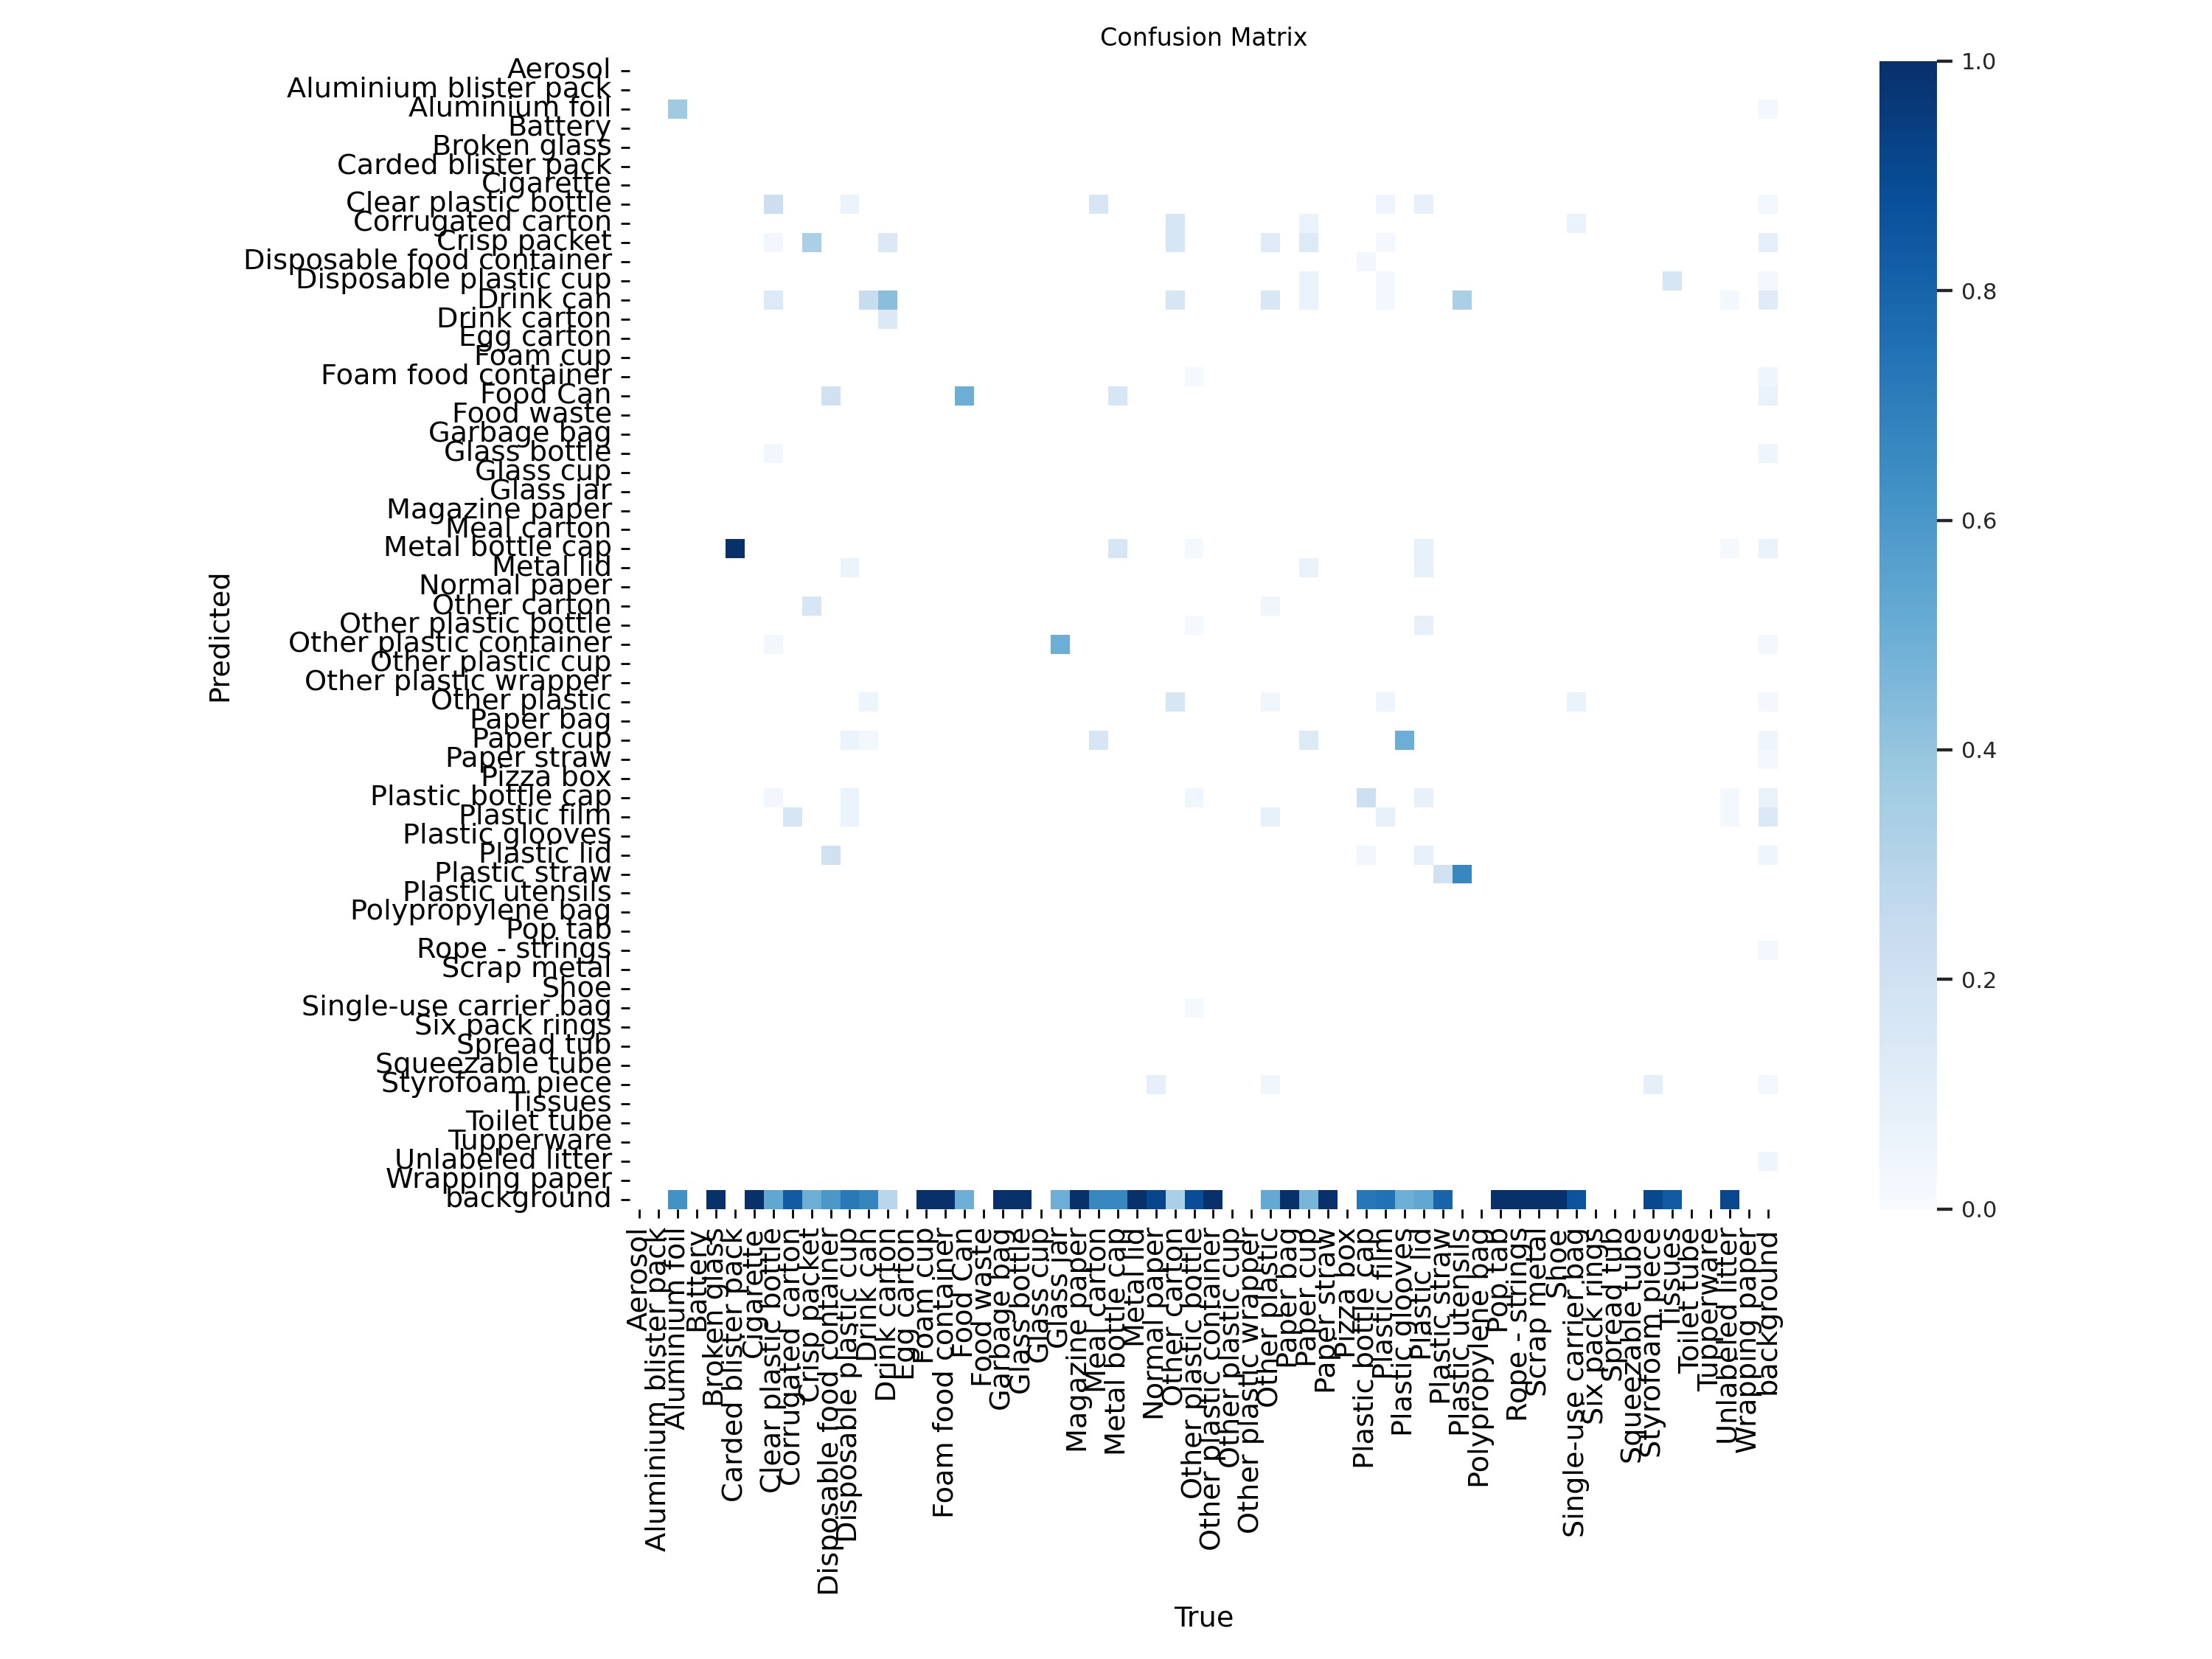

In [4]:
Image("/home/hpate061/CitrusHack/runs/detect/train/confusion_matrix.png")

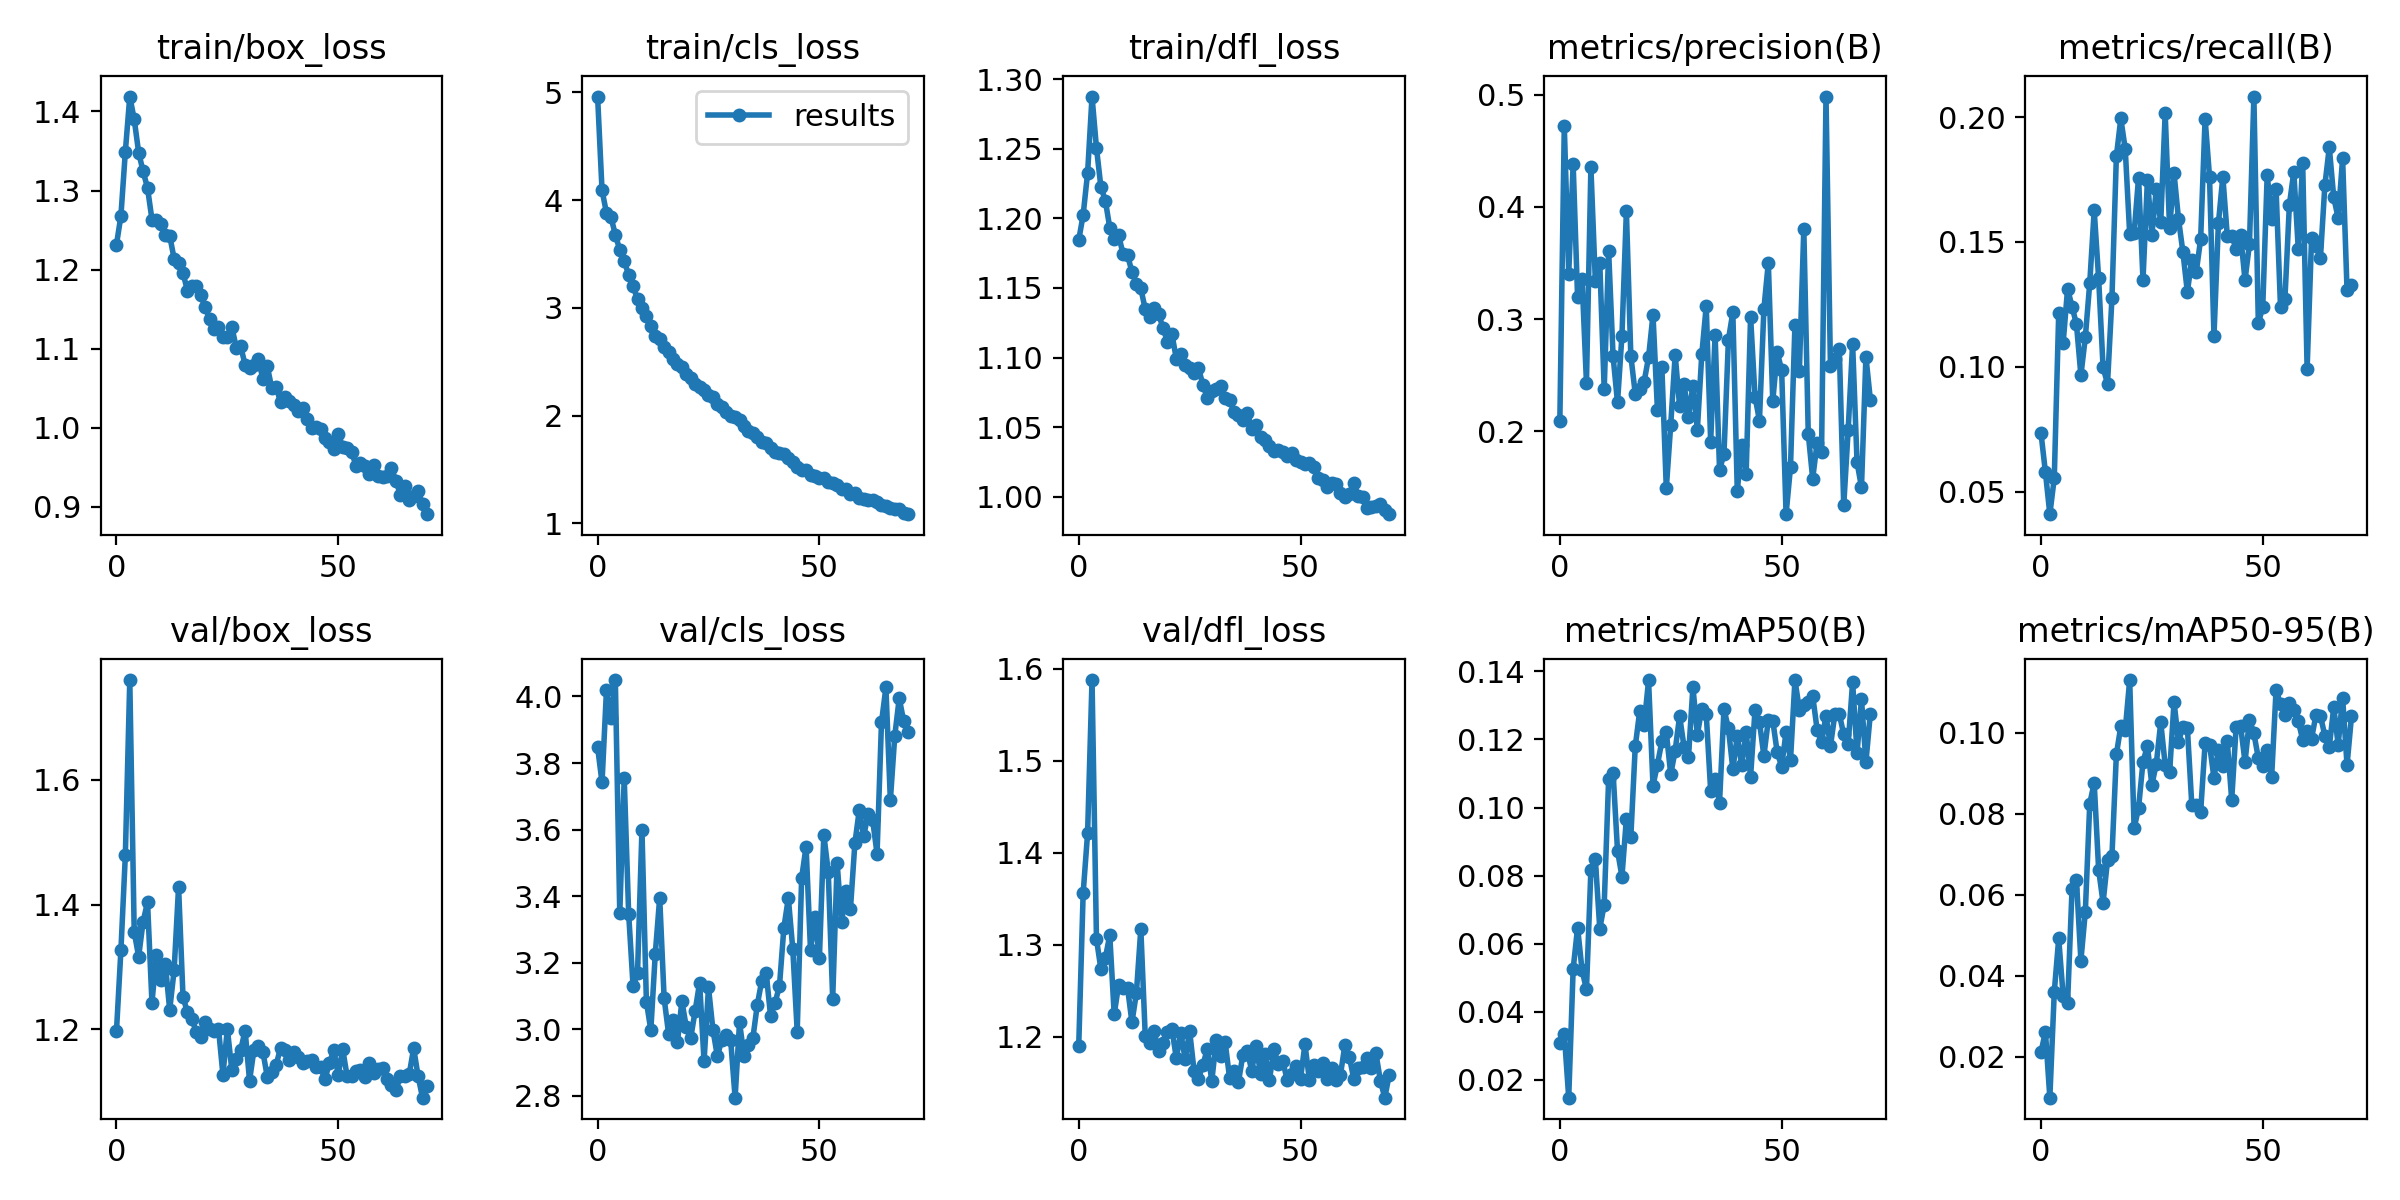

In [6]:
Image("/home/hpate061/CitrusHack/runs/detect/train/results.png")

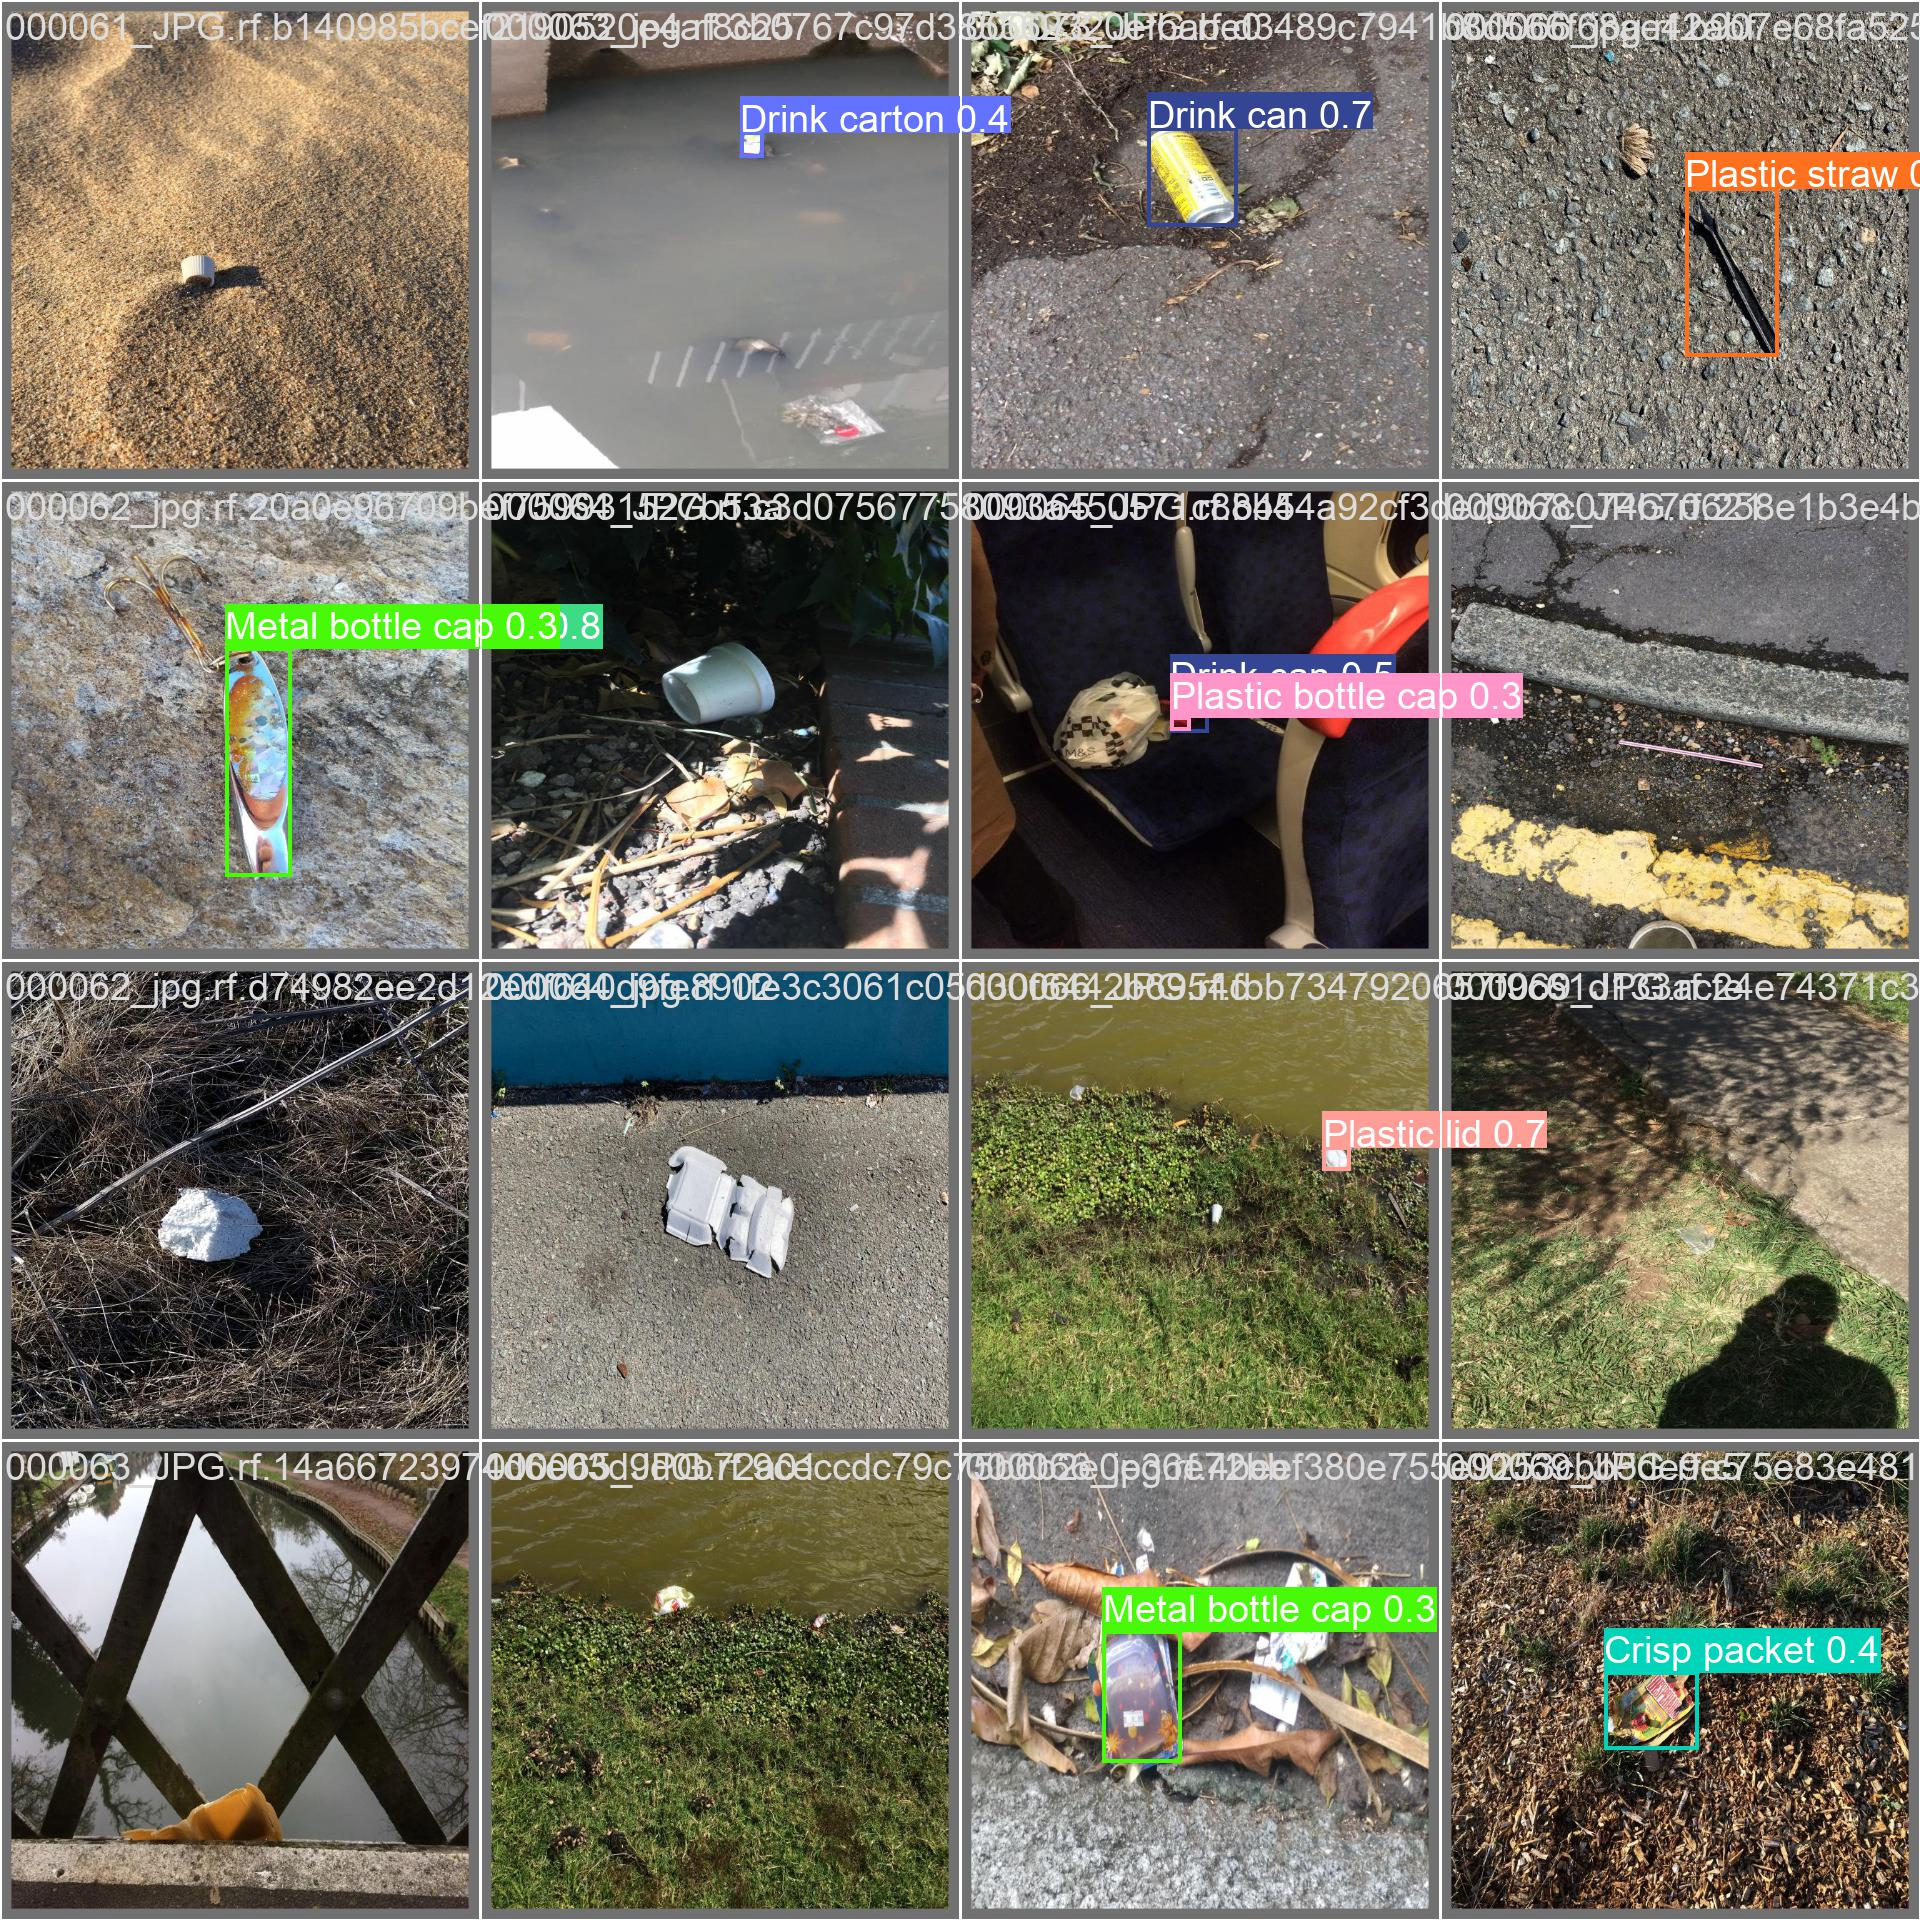

In [7]:
Image("/home/hpate061/CitrusHack/runs/detect/train/val_batch1_pred.jpg")

In [8]:
!yolo task=detect mode=val model=/home/hpate061/CitrusHack/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3017153 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/hpate061/CitrusHack/citrushackandcustom-1/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        225        674      0.267      0.154      0.137      0.113
        Aluminium foil        225          8      0.365      0.375      0.398      0.342
          Broken glass        225         34          1          0    0.00155   0.000609
   Carded blister pack        225          1          0          0          0          0
             Cigarette        225        103      0.067    0.00971      0.036     0.0196
  Clear plastic bottle        225         36      0.212      0.306        0.2      0.137
     Corrugated carton        225          6     0.0397      0.167     0.0151     0.0136
          Crisp packet        225          6    

In [9]:
!yolo task=detect mode=predict model=/home/hpate061/CitrusHack/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3017153 parameters, 0 gradients, 8.1 GFLOPs

image 1/150 /home/hpate061/CitrusHack/citrushackandcustom-1/test/images/000000_JPG.rf.f043849d1b715ebe36b8f2a3a955ba1c.jpg: 640x640 1 Plastic lid, 4.9ms
image 2/150 /home/hpate061/CitrusHack/citrushackandcustom-1/test/images/000001_jpg.rf.3e629fd6fa036fb2dc196a79d33637df.jpg: 640x640 2 Drink cans, 5.8ms
image 3/150 /home/hpate061/CitrusHack/citrushackandcustom-1/test/images/000002_JPG.rf.d4904a9b17e9945ce2d62359337f0d93.jpg: 640x640 1 Corrugated carton, 4.8ms
image 4/150 /home/hpate061/CitrusHack/citrushackandcustom-1/test/images/000002_jpg.rf.0e28cb95b073e4fb59cc664c94b51d3e.jpg: 640x640 (no detections), 5.3ms
image 5/150 /home/hpate061/CitrusHack/citrushackandcustom-1/test/images/000005_jpg.rf.9c5623b7d7838ff22ca719f7acb1c17f.jpg: 640x640 1 Clear plastic bottle, 1 Plastic film, 4.7ms
image 6/150 /home/hpate061/CitrusHa

In [10]:
project.version(dataset.version).deploy(model_type='yolov8', model_path="/home/hpate061/CitrusHack/runs/detect/train")

Dependency ultralytics<=8.0.20 is required but found version=8.0.90, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/hetty/citrushackandcustom/deploy/1
Share your model with the world at: https://universe.roboflow.com/hetty/citrushackandcustom/model/1
